In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51980_G')

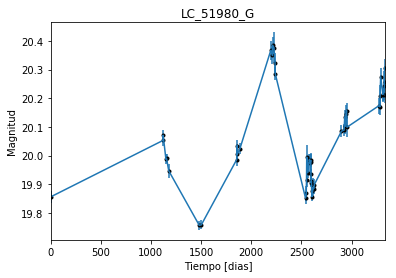

In [2]:
data = np.genfromtxt('LC_51980_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51980_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

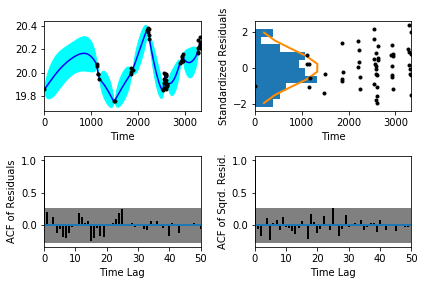

In [5]:
sample.assess_fit()

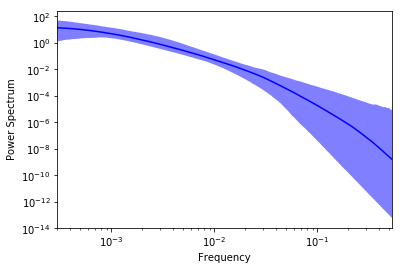

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51980_G')

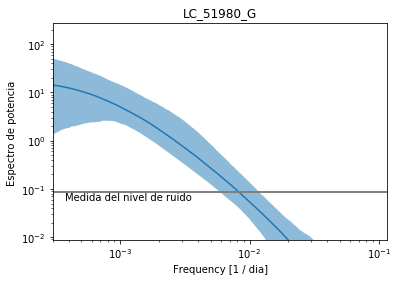

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51980_G')

Text(0.5,1,'Prediccion , valor esperado LC_51980_G')

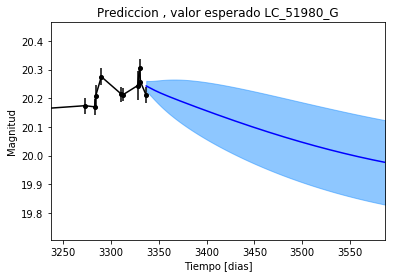

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51980_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_51980_G')

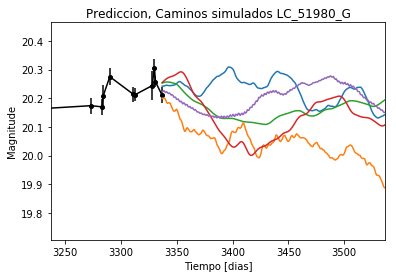

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_51980_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_51980_G')

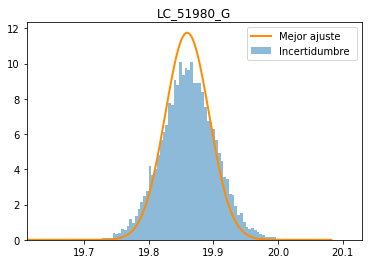

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51980_G')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_G')

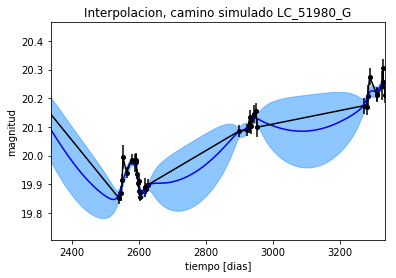

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_G')

Text(0.5,1,'Interpolacion, camino simulado LC_51980_G')

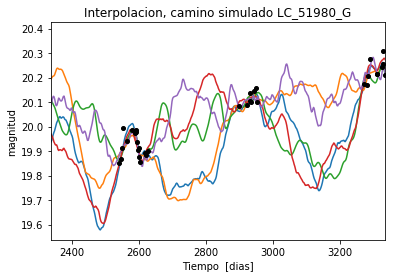

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51980_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 169.089721466
Median: 0.0379832418651
Standard deviation: 0.233965191863
68% credibility interval: [ 0.00361572  0.34167053]
95% credibility interval: [  4.60776315e-04   8.62171971e-01]
99% credibility interval: [  3.13469868e-04   1.02109008e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 515.215275086
Median: 0.00687310608531
Standard deviation: 0.101454814617
68% credibility interval: [ 0.00053165  0.05758547]
95% credibility interval: [  3.24905067e-04   3.40706164e-01]
99% credibility interval: [  3.05280559e-04   7.39357636e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 485.376596387
Median: 0.050631050707
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1522.79394577
Median: 104.845251401
Standard deviation: 1.6924970031
68% credibility interval: [ 102.97746694  106.05432351]
95% credibility interval: [ 100.19738822  106.7481008 ]
99% credibility interval: [  98.01098605  107.07269641]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 406.141868816
Median: 1.39592282978
Standard deviation: 2.4610015562
68% credibility interval: [ 0.19642018  5.026555  ]
95% credibility interval: [ 0.05206176  8.33874848]
99% credibility interval: [  0.02621377  11.2124914 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 587.88616918
Median: 1.91513825246
Standard deviation: 10.398597882
68% credibility interval: [  0.14978414  14.82724585]
95% credibility interval: [  1.47661348e-02

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 260.033719472
Median: 1.18733745571e-29
Standard deviation: 3.71777998545e+110
68% credibility interval: [  2.24031611e-61   6.62367517e+00]
95% credibility interval: [  1.68699733e-091   8.96798360e+107]
99% credibility interval: [  4.58581142e-095   1.48912396e+111]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1825.20586077
Median: 20.0192147983
Standard deviation: 0.0873729326967
68% credibility interval: [ 19.94118733  20.09104783]
95% credibility interval: [ 19.83614019  20.19031425]
99% credibility interval: [ 19.73861576  20.26758318]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 526.649781252
Median: 0.023168838055
Standard deviation: 0.283314556843
68% credibility interval: [ 0.          0.51600572]
95% credibility interval: [ 0.          0.94989409]
99% credibility interval: [ 0.          1.03597384]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 526.649781252
Median: 0.023168838055
Standard deviation: 0.283314556843
68% credibility interval: [ 0.          0.51600572]
95% credibility interval: [ 0.          0.94989409]
99% credibility interval: [ 0.          1.03597384]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2620.01352508
Median: 0.0
Standard deviation: 0.000398783803686
68% cred

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1522.79394577
Median: 104.845251401
Standard deviation: 1.6924970031
68% credibility interval: [ 102.97746694  106.05432351]
95% credibility interval: [ 100.19738822  106.7481008 ]
99% credibility interval: [  98.01098605  107.07269641]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 3506.91264323
Median: 0.0356379381933
Standard deviation: 0.0240243965375
68% credibility interval: [ 0.02290891  0.05779777]
95% credibility interval: [ 0.01607478  0.09938309]
99% credibility interval: [ 0.01325311  0.15044028]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1322.99869454
Median: 0.979489840026
Standard deviation: 0.180544211545
68% credibility interval: [ 0.82797954  1.17470562]
95% credibility interval: [ 0.70490278  1.41185205]
99% credibility interval: [ 0.63175619  1.58768618]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1076.80700907
Median: 0.00316105517391
Standard deviation: 0.114213590125
68% credibility interval: [  1.15416345e-05   4.09419658e-02]
95% credibility interval: [  8.46617692e-110   2.46646700e-001]
99% credibility interval: [  1.41370828e-114   6.53147827e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 169.089721466
Median: (-0.238655747206-1.73050631371j)
Standard deviation: 2.30864825582
68% credibility interval: [-2.14677923-1.25974546j -0.02271821-2.87724368j]
95% credibility interval: [ -5.41718626e+00+0.j          -2.89514297e-03-1.19244179j]
99% credibility interval: [ -6.41569817e+00+0.j          -1.96958927e-03-0.00171718j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 515.215275086
Median: (-0.0431849991699+5.38474427752j)
Standard deviation: 1.89081307535
68% credibility interval: [-0.36182016+0.20174691j -0.00334048+0.j        ]
95% credibility interval: [ -2.14071996e+00+2.97800746j  -2.04143874e-03+2.92409075j]
99% credibility interval: [ -4.64552104e+00+1.90671036j  -1.91813433e-03+0.j        ]
Poste